In [10]:
import sympy as sp
import math as mt
import matplotlib.pyplot as plt
import numpy as np

# Soluciones Computacionales a Problemas de Ingeniería IST4360




*   Estudiantes: Kenny Zhu Ye, Samir Mercado
*   Código: 200164380, 200161553



## Ejercicio 1
La función $f(x) = \tan (\pi x) -6$ tiene una raíz en $(1/\pi)\arctan (6)$. Escoja tres métodos de su preferencia, fije los valores iniciales a usar en cada uno y haga un máximo de 10 iteraciones. ¿Cuál de los métodos se desempeña mejor?¿Por qué?

### Grafica de la función y la raiz solicitada

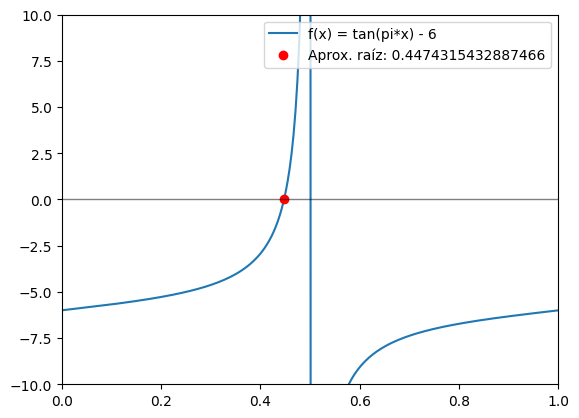

In [11]:
x = sp.Symbol('x')
f = sp.tan(sp.pi*x) - 6

f_func = sp.lambdify(x, f)

# Define el rango de valores de x
x_vals = np.linspace(-2, 2, 1000)

# Calcula los valores de y para la función f(x)
y_vals = [f_func(x_val) for x_val in x_vals]

# Grafica la función f(x)
plt.plot(x_vals, y_vals, label="f(x) = tan(pi*x) - 6")

# Grafica la raíz aproximada
plt.plot((1/mt.pi)*mt.atan(6), f_func((1/mt.pi)*mt.atan(6)), 'ro', label=f"Aprox. raíz: {(1/mt.pi)*mt.atan(6)}")

# Grafica una línea horizontal en y=0 para resaltar el eje x
plt.axhline(y=0, color='k', linewidth=1, alpha=0.5)

# Configura los límites de los ejes x e y
plt.xlim(0, 1)
plt.ylim(-10, 10)

# Añade una leyenda
plt.legend()

# Muestra el gráfico
plt.show()


#### Newton-Raphson 

In [12]:
# Define la derivada f'(x)
df = f.diff(x)  

# Define la función f(x) como una función lambda
f_func = sp.lambdify(x, f)

# Define la derivada f'(x) como una función lambda
df_func = sp.lambdify(x, df)

# Define el número de iteraciones y el valor inicial
N = 10
xi = 0.41

found = None

# Ejecuta el método de Newton-Raphson
for i in range(1, N+1):
    xi = xi - f_func(xi)/df_func(xi)
    print(f"n= {str(i)}, raíz aproximada = {xi}")

    # Verifica si la raíz encontrada es igual al valor de referencia
    reference_value = (1/mt.pi) * mt.atan(6)
    if mt.isclose(xi, reference_value, abs_tol= 1e-100, rel_tol=1e-100) and found is None:
        found = i

# Guarda la raíz aproximada en la variable 'root'
root = xi

if found is not None:
    print(f"Se encontró la raíz aproximada de {root} en la iteración {found}")
else:
    print(f"No se encontró la raíz {reference_value} en las {i} iteraciones.")


n= 1, raíz aproximada = 0.4733763978843497
n= 2, raíz aproximada = 0.4602065330189552
n= 3, raíz aproximada = 0.4505198599017337
n= 4, raíz aproximada = 0.44761151285315465
n= 5, raíz aproximada = 0.44743215384613333
n= 6, raíz aproximada = 0.44743154329577334
n= 7, raíz aproximada = 0.4474315432887466
n= 8, raíz aproximada = 0.4474315432887466
n= 9, raíz aproximada = 0.4474315432887466
n= 10, raíz aproximada = 0.4474315432887466
Se encontró la raíz aproximada de 0.4474315432887466 en la iteración 7


### Bisección

In [13]:
x = sp.Symbol('x')
f = sp.tan(sp.pi*x) - 6

# Define la función f(x) como una función lambda
f_func = sp.lambdify(x, f)

# Define los límites del intervalo [a, b] y el número de iteraciones
a = 0.4
b = 0.41
N = 10

found = None

# Verifica que f(a) y f(b) tengan signos opuestos
if f_func(a) * f_func(b) >= 0:
    print("El método de bisección no garantiza una solución en este intervalo.")
else:
    # Ejecuta el método de bisección
    for i in range(1, N+1):
        c = (a + b) / 2  # Calcula el punto medio

        # Imprime la iteración y la raíz aproximada en esta iteración
        print(f"Iteración {i}, raíz aproximada: {c}")

        # Verifica si la raíz encontrada es igual al valor de referencia
        reference_value = (1/mt.pi) * mt.atan(6)
        if mt.isclose(c, reference_value, abs_tol= 1e-100, rel_tol=1e-100) and found is None:
            found = i

        # Actualiza el intervalo
        if f_func(c) * f_func(a) < 0:
            b = c
        else:
            a = c

    # Guarda la raíz aproximada en la variable 'root'
    root = c

if found is not None:
    print(f"Se encontró la raíz aproximada de {root} por primera vez en la iteración {found}")
else:
    print(f"No se encontró la raíz {reference_value} en las {N} iteraciones.")


El método de bisección no garantiza una solución en este intervalo.
No se encontró la raíz 0.4474315432887466 en las 10 iteraciones.


### Secante

In [14]:
x = sp.Symbol('x')
f = sp.tan(sp.pi*x) - 6

# Define la función f(x) como una función lambda
f_func = sp.lambdify(x, f)

# Define los valores iniciales x0 y x1, el número de iteraciones y la tolerancia
x0 = 0.4
x1 = 0.41
N = 10

found = None

# Ejecuta el método de la secante
for i in range(1, N+1):
    
    # Verifica si el denominador en la división se vuelve cero
    if f_func(x1) - f_func(x0) == 0:
        x2 = np.nan
    else:
        # Calcula el siguiente valor de x
        x2 = x1 - ((x1 - x0)) * f_func(x1)  / (f_func(x1) - f_func(x0))

    # Actualiza los valores de x0 y x1
    x0, x1 = x1, x2

    # Imprime la iteración y la raíz aproximada en esta iteración
    print(f"Iteración {i}, raíz aproximada: {x2}")

    # Verifica si la raíz encontrada es igual al valor de referencia
    reference_value = (1/mt.pi) * mt.atan(6)
    if mt.isclose(x2, reference_value, abs_tol= 1e-100, rel_tol=1e-100) and found is None:
        found = i 

# Guarda la raíz aproximada en la variable 'root'
root = x2

if found is not None:
    print(f"Se encontró la raíz aproximada de {root} en la iteración {found}")
else:
    print(f"No se encontró la raíz {reference_value} en las {N} iteraciones.")

Iteración 1, raíz aproximada: 0.48020871073502286
Iteración 2, raíz aproximada: 0.4242301152772485
Iteración 3, raíz aproximada: 0.43303687133742264
Iteración 4, raíz aproximada: 0.45367866293417214
Iteración 5, raíz aproximada: 0.44573840231365985
Iteración 6, raíz aproximada: 0.44723200132686663
Iteración 7, raíz aproximada: 0.4474379095507993
Iteración 8, raíz aproximada: 0.44743151934427644
Iteración 9, raíz aproximada: 0.44743154328587326
Iteración 10, raíz aproximada: 0.4474315432887466
Se encontró la raíz aproximada de 0.4474315432887466 en la iteración 10


- El metodo que mejor se comportó es el metodo de Newton-Raphson ya que lo encontró raiz pedida que es $(1/\pi)\arctan (6)$ en menos iteraciones con puntos inciales cercanas.
- Aunque el metodo del secante no pide la derivada esa necesita 2 puntos por la cual podemos ver que al utilizar valores inicales parecidas encuentra la raiz pedida en mas iteraciones, y el metodo de biseccion podemos observar que no encontro la raiz en las 10 iteraciones pedidas, ademas no garantiza una solucion con esos valores iniciales que se esta utilizando.

## Ejercicio 2
La probabilidad de que en un juego de Racquetball (con dos jugadores A y B) el jugador A gane con un puntaje 21-0 viene dada por la expresión:
$$P=\frac{1+p}{2}\left(\frac{p}{1-p+p^2}\right)^{21},$$
donde $p$ denota la probabilidad de que el jugador A gane cualquier juego (indenpendiente del saque). Determine con una tolerancia de $10^{-3}$ el mínimo valor de $p$ tal que A ganará en al menos la mitad de los juegos con B.

In [15]:
# Define la variable p
p = sp.Symbol('p')

# Define la función P
P = ((1 + p) / 2) * (p / (1 - p + p**2))**21 - 1/2 # Restamos 1/2 porque es al menos la mitad

# Define la función P(p) como una función lambda
P_func = sp.lambdify(p, P)

# Define los valores iniciales a y b, y la tolerancia
a = 0
b = 1
tol = 1e-3
N = 100

# Ejecuta el método de bisección
for i in range(1,N):

    if P_func(b) * P_func(a) > 0:
        raise ValueError("El intervalo proporcionado no cumple las condiciones necesarias.")

    c = (a + b) / 2     
    print(f"Iteración {i}, raíz aproximada: {c}")  

    # Comprueba si el punto medio c satisface la tolerancia
    if P_func(c) == 0 or (b - a) / 2 < tol:
        break

    # Actualiza a o b según el signo de P(c)
    if P_func(c) * P_func(a) < 0:
        b = c
    elif P_func(c) * P_func(b) < 0:
        a = c
    else:
        break

# Imprime el valor mínimo de p
print(f"El mínimo valor de p para que A gane al menos la mitad de los juegos con B es aproximadamente {c}")
print(f"Es decir : {c*100}%")

Iteración 1, raíz aproximada: 0.5
Iteración 2, raíz aproximada: 0.75
Iteración 3, raíz aproximada: 0.875
Iteración 4, raíz aproximada: 0.8125
Iteración 5, raíz aproximada: 0.84375
Iteración 6, raíz aproximada: 0.828125
Iteración 7, raíz aproximada: 0.8359375
Iteración 8, raíz aproximada: 0.83984375
Iteración 9, raíz aproximada: 0.841796875
Iteración 10, raíz aproximada: 0.8427734375
El mínimo valor de p para que A gane al menos la mitad de los juegos con B es aproximadamente 0.8427734375
Es decir : 84.27734375%


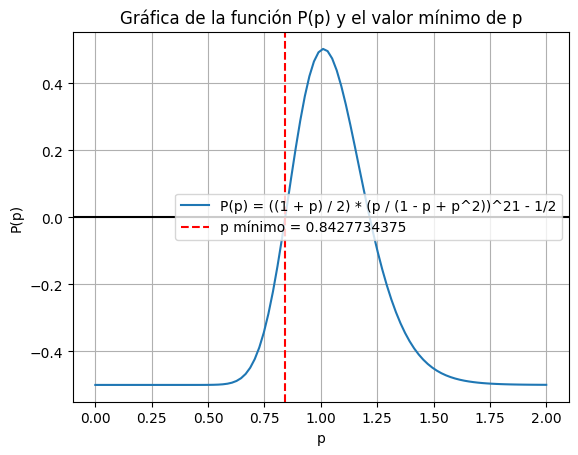

In [16]:
p_vals = np.linspace(0, 2, 100)
P_vals = P_func(p_vals)

plt.plot(p_vals, P_vals, label='P(p) = ((1 + p) / 2) * (p / (1 - p + p^2))^21 - 1/2')
plt.axhline(0, color='black')
plt.axvline(c, color='red', linestyle='--', label=f'p mínimo = {c}')
plt.legend()
plt.xlabel('p')
plt.ylabel('P(p)')
plt.title('Gráfica de la función P(p) y el valor mínimo de p')
plt.grid(True)
plt.show()

## Ejercicio 3
La función $f(x) = 4x^2-e^{x}-e^{-x}$ tiene dos raíces positivas $x_{1},\, x_{2}$, use el método de Newton para aproximar estos valores con una tolerancia de $10^{-6}$.

In [17]:
# Define la variable x
x = sp.Symbol('x')

# Define la función f(x)
f = 4*x**2 - sp.exp(x) - sp.exp(-x)

# Calcula la derivada de f con respecto a x
df = f.diff(x)

# Define la función f(x) como una función lambda
f_func = sp.lambdify(x, f)

# Define la derivada f'(x) como una función lambda
df_func = sp.lambdify(x, df)

# Define los valores iniciales y la tolerancia
x1_initial = 0.8
x2_initial = 4.3
tol = 10**-6
N = 10

# Ejecuta el método de Newton-Raphson para la primera raíz
x1 = x1_initial
for i in range(N):
    x1_next = x1 - f_func(x1) / df_func(x1)
    
    if abs(x1_next - x1) < tol:
        break

    x1 = x1_next

# Ejecuta el método de Newton-Raphson para la segunda raíz
x2 = x2_initial
for i in range(N):
    x2_next = x2 - f_func(x2) / df_func(x2)
    
    if abs(x2_next - x2) < tol:
        break

    x2 = x2_next

# Imprime las raíces aproximadas
print(f"La primera raíz positiva es aproximadamente x1 = {x1}")
print(f"La segunda raíz positiva es aproximadamente x2 = {x2}")

La primera raíz positiva es aproximadamente x1 = 0.824498651241098
La segunda raíz positiva es aproximadamente x2 = 4.306245274411121


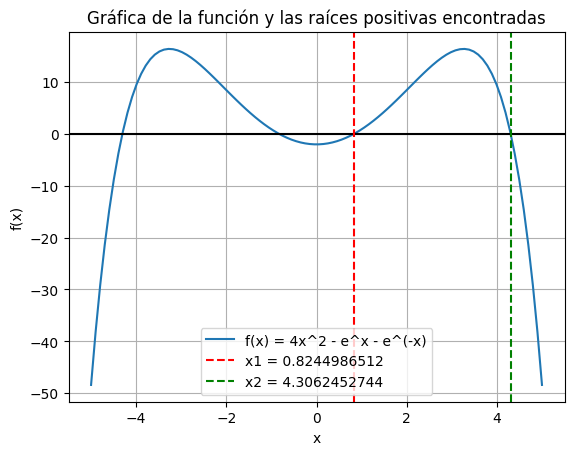

In [18]:
# Grafica la función y las raíces encontradas
x_vals = np.linspace(-5, 5, 100)
y_vals = f_func(x_vals)

plt.plot(x_vals, y_vals, label='f(x) = 4x^2 - e^x - e^(-x)')
plt.axhline(0, color='black')
plt.axvline(x1, color='red', linestyle='--', label=f'x1 = {x1:.10f}')
plt.axvline(x2, color='green', linestyle='--', label=f'x2 = {x2:.10f}')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de la función y las raíces positivas encontradas')
plt.grid(True)
plt.show()


**Nota:** Por favor incluir en el archivo que contenga la solución los script, funciones, gráficas, código y cualquier otro elemento utilizado. No coloque respuestas sin justificación, muestre todo los desarrollos.

**Recuerde:** En este curso no se tolerará el plagio. Sin excepción, en caso de presentarse esta situación, a los estudiantes involucrados se les iniciará proceso de investigación, y se actuará en conformidad con el Reglamento de Estudiantes de la Universidad del Norte. El plagio incluye: usar contenidos sin la debida referencia, de manera literal o con mínimos cambios que no alteren el espíritu del texto/código; adquirir con o sin intención, trabajos de terceros y presentarlos parcial o totalmente como propios; presentar trabajos en grupo donde alguno de los integrantes no trabajó o donde no se hubo trabajo en equipo demostrable; entre otras situaciones definidas en el manual de fraude académico de la Universidad del Norte ([pdf](https://guayacan.uninorte.edu.co/normatividad_interna/upload/File/Guia_Prevencion_Fraude%20estudiantes(5).pdf)).